In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact

/home/jkarasev/.local/lib/python3.10/site-packages/numpy/_core/getlimits.py:548: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [115]:
Qx, Qy, U, K, L, Kx, Ky, Lx, Ly, w, r, a, b, d, I, U, Cx, Cy, Px, Py = symbols(r'Q_x Q_y U K L K_x K_y L_x L_y w r \alpha \beta \delta I U C_x C_y P_x P_y')
qx_eq = Eq(Qx, Kx**(a) * Lx**(1-a))
qy_eq = Eq(Qy, Ky**(b) * Ly**(1-b))
qx_contraint = sympy.simplify(Eq(w/r, diff(qx_eq.rhs, Lx)/diff(qx_eq.rhs, Kx)))
qy_contraint = sympy.simplify(Eq(w/r, diff(qy_eq.rhs, Ly)/diff(qy_eq.rhs, Ky)))
display(qx_contraint)
display(qy_contraint)

Eq(w/r, K_x*(1 - \alpha)/(L_x*\alpha))

Eq(w/r, K_y*(1 - \beta)/(L_y*\beta))

In [89]:
# solve a system of equations using qx_constraint and qx_eq to solve for Kx and Lx in terms of w and r
Kx_eq, Lx_eq = solve((qx_contraint, qx_eq), (Kx, Lx))[0]
Ky_eq, Ly_eq = solve((qy_contraint, qy_eq), (Ky, Ly))[0]
display(Kx_eq)

-Q_x*\alpha**(1 - \alpha)*w**(1 - \alpha)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(r*(\alpha - 1))

In [90]:
Kx_eq = Eq(Kx, sympy.simplify(Kx_eq))
Lx_eq = Eq(Lx, sympy.simplify(Lx_eq))
Ky_eq = Eq(Ky, sympy.simplify(Ky_eq))
Ly_eq = Eq(Ly, sympy.simplify(Ly_eq))
display(Kx_eq)
display(Lx_eq)
display(Ky_eq)
display(Ly_eq)


Eq(K_x, -Q_x*\alpha**(1 - \alpha)*w**(1 - \alpha)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(r*(\alpha - 1)))

Eq(L_x, Q_x*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(\alpha**\alpha*w**\alpha))

Eq(K_y, -Q_y*\beta**(1 - \beta)*w**(1 - \beta)*exp(-\beta*log(-1/(r*(\beta - 1))))/(r*(\beta - 1)))

Eq(L_y, Q_y*exp(-\beta*log(-1/(r*(\beta - 1))))/(\beta**\beta*w**\beta))

In [91]:
cx_eq = Eq(Cx, sympy.simplify(w*Lx_eq.rhs + r*Kx_eq.rhs))
cy_eq = Eq(Cy, sympy.simplify(w*Ly_eq.rhs + r*Ky_eq.rhs))
display(cx_eq)
display(cy_eq)
Px_eq = Eq(Px, cx_eq.rhs/Qx)
Py_eq = Eq(Py, cy_eq.rhs/Qy)
display(Px_eq)
display(Py_eq)

Eq(C_x, -Q_x*w**(1 - \alpha)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(\alpha**\alpha*(\alpha - 1)))

Eq(C_y, -Q_y*w**(1 - \beta)*exp(-\beta*log(-1/(r*(\beta - 1))))/(\beta**\beta*(\beta - 1)))

Eq(P_x, -w**(1 - \alpha)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(\alpha**\alpha*(\alpha - 1)))

Eq(P_y, -w**(1 - \beta)*exp(-\beta*log(-1/(r*(\beta - 1))))/(\beta**\beta*(\beta - 1)))

In [92]:
l_eq = Eq(L, Lx + Ly)
k_eq = Eq(K, Kx + Ky)
display(l_eq)
display(k_eq)

Eq(L, L_x + L_y)

Eq(K, K_x + K_y)

In [93]:
u_eq = Eq(U, Qx**(d) * Qy**(1-d))
display(u_eq)
i_consume_eq = Eq(I, Px * Qx + Py * Qy)
i_earn_eq = Eq(I, r * K + w * L)
i_eq = Eq(i_consume_eq.rhs, i_earn_eq.rhs)
u_constraint = sympy.simplify(Eq(Px / Py, diff(u_eq.rhs, Qx) / diff(u_eq.rhs, Qy)))
display(i_eq)
display(u_constraint)

Eq(U, Q_x**\delta*Q_y**(1 - \delta))

Eq(P_x*Q_x + P_y*Q_y, K*r + L*w)

Eq(P_x/P_y, -Q_y*\delta/(Q_x*(\delta - 1)))

In [94]:
res = solve((u_constraint, i_eq), (Qx, Qy))
c_qx_eq = res[Qx]
c_qy_eq = res[Qy]
display(res)
c_qx_eq = sympy.simplify(Eq(Qx, c_qx_eq))
c_qy_eq = sympy.simplify(Eq(Qy, c_qy_eq))
display(c_qx_eq)
display(c_qy_eq)

{Q_x: \delta*(K*r + L*w)/P_x, Q_y: (-K*\delta*r + K*r - L*\delta*w + L*w)/P_y}

Eq(Q_x, \delta*(K*r + L*w)/P_x)

Eq(Q_y, (-K*\delta*r + K*r - L*\delta*w + L*w)/P_y)

In [95]:
# substitute Kx, Lx, Ky, Ly into l_eq and k_eq
l_eq = l_eq.subs([(Lx, Lx_eq.rhs), (Ly, Ly_eq.rhs)])
k_eq = k_eq.subs([(Kx, Kx_eq.rhs), (Ky, Ky_eq.rhs)])
display(l_eq)
display(k_eq)

Eq(L, Q_x*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(\alpha**\alpha*w**\alpha) + Q_y*exp(-\beta*log(-1/(r*(\beta - 1))))/(\beta**\beta*w**\beta))

Eq(K, -Q_x*\alpha**(1 - \alpha)*w**(1 - \alpha)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(r*(\alpha - 1)) - Q_y*\beta**(1 - \beta)*w**(1 - \beta)*exp(-\beta*log(-1/(r*(\beta - 1))))/(r*(\beta - 1)))

In [96]:
# substitute c_qx_eq and c_qy_eq into l_eq and k_eq
l_eq = l_eq.subs([(Qx, c_qx_eq.rhs), (Qy, c_qy_eq.rhs)])
k_eq = k_eq.subs([(Qx, c_qx_eq.rhs), (Qy, c_qy_eq.rhs)])
display(l_eq)
display(k_eq)

Eq(L, (-K*\delta*r + K*r - L*\delta*w + L*w)*exp(-\beta*log(-1/(r*(\beta - 1))))/(P_y*\beta**\beta*w**\beta) + \delta*(K*r + L*w)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(P_x*\alpha**\alpha*w**\alpha))

Eq(K, -\beta**(1 - \beta)*w**(1 - \beta)*(-K*\delta*r + K*r - L*\delta*w + L*w)*exp(-\beta*log(-1/(r*(\beta - 1))))/(P_y*r*(\beta - 1)) - \alpha**(1 - \alpha)*\delta*w**(1 - \alpha)*(K*r + L*w)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(P_x*r*(\alpha - 1)))

In [97]:
# substitute Px_eq and Py_eq into l_eq and k_eq
l_eq = l_eq.subs([(Px, Px_eq.rhs), (Py, Py_eq.rhs)])
k_eq = k_eq.subs([(Px, Px_eq.rhs), (Py, Py_eq.rhs)])
display(l_eq)
display(k_eq)

Eq(L, -\delta*w**(\alpha - 1)*(\alpha - 1)*(K*r + L*w)/w**\alpha - w**(\beta - 1)*(\beta - 1)*(-K*\delta*r + K*r - L*\delta*w + L*w)/w**\beta)

Eq(K, \alpha**\alpha*\alpha**(1 - \alpha)*\delta*w**(1 - \alpha)*w**(\alpha - 1)*(K*r + L*w)/r + \beta**\beta*\beta**(1 - \beta)*w**(1 - \beta)*w**(\beta - 1)*(-K*\delta*r + K*r - L*\delta*w + L*w)/r)

In [98]:
l_eq_s = sympy.simplify(l_eq)
k_eq_s = sympy.simplify(k_eq)
display(l_eq_s)
display(k_eq_s)

Eq(L, (-\delta*(\alpha - 1)*(K*r + L*w) + (\beta - 1)*(K*\delta*r - K*r + L*\delta*w - L*w))/w)

Eq(K, (\alpha*\delta*(K*r + L*w) - \beta*(K*\delta*r - K*r + L*\delta*w - L*w))/r)

In [99]:
# solve for r and w
w1 = Eq(w, 1)  # return to factors of production is relative to wage.
r_w_s = solve((l_eq_s, k_eq_s, w1), r)
r_w_s = sympy.simplify(r_w_s)
display(r_w_s)

{r: L*w*(-\alpha*\delta + \beta*\delta - \beta)/(K*(\alpha*\delta - \beta*\delta + \beta - 1))}

In [111]:
# simplify Kx and Lx 
display(Kx_eq)
display(Lx_eq)
display(c_qx_eq)
Kx_eq_qx = Kx_eq.subs(Qx, c_qx_eq.rhs)
Lx_eq_qx = Lx_eq.subs(Qx, c_qx_eq.rhs)
display(Kx_eq_qx)
display(Lx_eq_qx)
Kx_eq_qx_px = Kx_eq_qx.subs(Px, Px_eq.rhs)
Lx_eq_qx_px = Lx_eq_qx.subs(Px, Px_eq.rhs)
display(Kx_eq_qx_px)
display(Lx_eq_qx_px)
k_l_x = Eq(Kx/Lx, sympy.simplify(Kx_eq_qx_px.rhs/Lx_eq_qx_px.rhs))
display(k_l_x)

Eq(K_x, -Q_x*\alpha**(1 - \alpha)*w**(1 - \alpha)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(r*(\alpha - 1)))

Eq(L_x, Q_x*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(\alpha**\alpha*w**\alpha))

Eq(Q_x, \delta*(K*r + L*w)/P_x)

Eq(K_x, -\alpha**(1 - \alpha)*\delta*w**(1 - \alpha)*(K*r + L*w)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(P_x*r*(\alpha - 1)))

Eq(L_x, \delta*(K*r + L*w)*exp(-\alpha*log(-1/(r*(\alpha - 1))))/(P_x*\alpha**\alpha*w**\alpha))

Eq(K_x, \alpha**\alpha*\alpha**(1 - \alpha)*\delta*w**(1 - \alpha)*w**(\alpha - 1)*(K*r + L*w)/r)

Eq(L_x, -\delta*w**(\alpha - 1)*(\alpha - 1)*(K*r + L*w)/w**\alpha)

Eq(K_x/L_x, -\alpha*w/(r*(\alpha - 1)))

In [112]:
# simplify Ky and Ly
display(Ky_eq)
display(Ly_eq)
display(c_qy_eq)
Ky_eq_qy = Ky_eq.subs(Qy, c_qy_eq.rhs)
Ly_eq_qy = Ly_eq.subs(Qy, c_qy_eq.rhs)
display(Ky_eq_qy)
display(Ly_eq_qy)
Ky_eq_qy_py = Ky_eq_qy.subs(Py, Py_eq.rhs)
Ly_eq_qy_py = Ly_eq_qy.subs(Py, Py_eq.rhs)
display(Ky_eq_qy_py)
display(Ly_eq_qy_py)
k_l_y = Eq(Ky/Ly, sympy.simplify(Ky_eq_qy_py.rhs/Ly_eq_qy_py.rhs))
display(k_l_y)

Eq(K_y, -Q_y*\beta**(1 - \beta)*w**(1 - \beta)*exp(-\beta*log(-1/(r*(\beta - 1))))/(r*(\beta - 1)))

Eq(L_y, Q_y*exp(-\beta*log(-1/(r*(\beta - 1))))/(\beta**\beta*w**\beta))

Eq(Q_y, (-K*\delta*r + K*r - L*\delta*w + L*w)/P_y)

Eq(K_y, -\beta**(1 - \beta)*w**(1 - \beta)*(-K*\delta*r + K*r - L*\delta*w + L*w)*exp(-\beta*log(-1/(r*(\beta - 1))))/(P_y*r*(\beta - 1)))

Eq(L_y, (-K*\delta*r + K*r - L*\delta*w + L*w)*exp(-\beta*log(-1/(r*(\beta - 1))))/(P_y*\beta**\beta*w**\beta))

Eq(K_y, \beta**\beta*\beta**(1 - \beta)*w**(1 - \beta)*w**(\beta - 1)*(-K*\delta*r + K*r - L*\delta*w + L*w)/r)

Eq(L_y, -w**(\beta - 1)*(\beta - 1)*(-K*\delta*r + K*r - L*\delta*w + L*w)/w**\beta)

Eq(K_y/L_y, -\beta*w/(r*(\beta - 1)))

In [128]:
alpha_v = 0.25
beta_v = 0.75
delta_v = 0.25
w_v = 1
L_v = 100
K_v = 100

# find the rental and wage values
r_w_s_func = sympy.lambdify((w, L, K, a, b, d), r_w_s[r], 'numpy')
w_value = 1
r_value = r_w_s_func(w_value, L_v, K_v, alpha_v, beta_v, delta_v)

# find the cone K/L ratios 
k_l_x_func = sympy.lambdify((w, r, a), k_l_x.rhs, 'numpy')
k_l_y_func = sympy.lambdify((w, r, b), k_l_y.rhs, 'numpy')
k_l_x_v = k_l_x_func(w_value, r_value, alpha_v)
k_l_y_v = k_l_y_func(w_value, r_value, beta_v)

In [129]:
def plot_wage_rental(ax): 
    x_w = np.linspace(0, 1/w_value, 10)
    y_r_f = lambda x: -1 * w_value / r_value * x + 1 / r_value
    y_r = y_r_f(x_w)
    ax.plot(x_w, y_r)

In [130]:
def plot_cone(ax): 
    x_l = np.linspace(0, 1/w_value, 10)
    y_l = np.linspace(0, 1/w_value, 10)
    x_k = x_l * k_l_x_v
    y_k = y_l * k_l_y_v
    ax.plot(x_l, x_k)
    ax.plot(y_l, y_k)

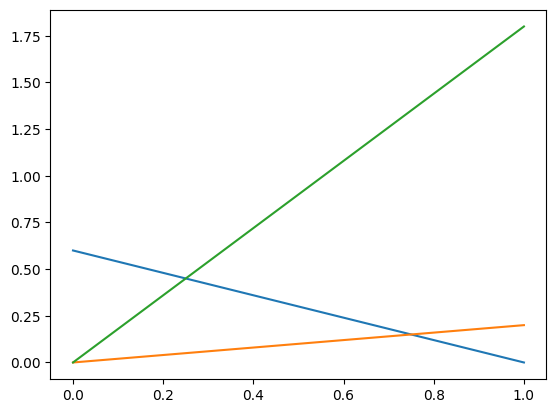

In [131]:
# generate 10 values between 0 and 1/w_value
fig, ax = plt.subplots()
plot_wage_rental(ax)
plot_cone(ax)
fig.show()